_________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

### Rogelio Ceballos Castillo 74823
### Gerardo Yael Olvera Gomez 75341

___________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

# Conteo vehicular a través de técnicas clásicas con una imagen y un video

## Proceso para la imagen

### Importaciones

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

### KERNEL

In [2]:

# Tamaño del kernel (asegúrate de que sea un número impar para que tenga un centro)
tamaño_kernel = 5

# Crear una matriz de ceros del tamaño especificado
kernel = np.zeros((tamaño_kernel, tamaño_kernel), dtype=np.uint8)

# Calcular el centro del kernel
centro_x, centro_y = tamaño_kernel // 2, tamaño_kernel // 2

# Calcular el radio del círculo
radio = tamaño_kernel // 2

# Generar un círculo en el kernel
y, x = np.ogrid[-centro_x:tamaño_kernel - centro_x, -centro_y:tamaño_kernel - centro_y]
mascara = x**2 + y**2 <= radio**2
kernel[mascara] = 1

#Imprimir el kernel
print(kernel)


[[0 0 1 0 0]
 [0 1 1 1 0]
 [1 1 1 1 1]
 [0 1 1 1 0]
 [0 0 1 0 0]]


### Canales de la imagen

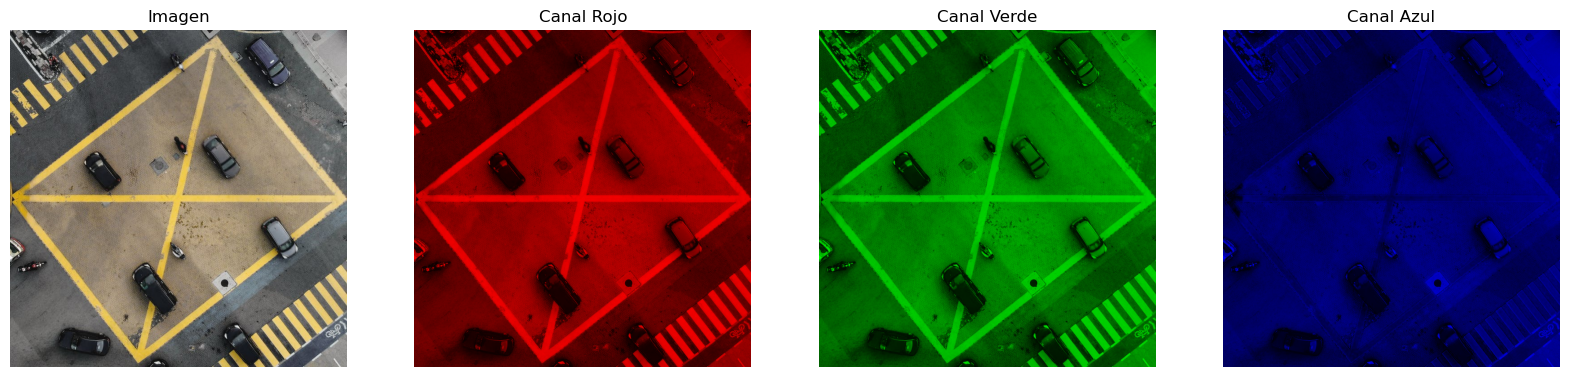

In [3]:
# Cargar la imagen
image_ = cv2.imread('./imagenes y videos/Imagen de los coches (editado).jpeg')

# Convertir la imagen a escala de grises
imagen_rgb = cv2.cvtColor(image_, cv2.COLOR_BGR2RGB)

img_R = imagen_rgb.copy()#|
img_G = imagen_rgb.copy()#|se crean copias del frame con formato RGB(frame_rgb) para trabajar con los canales:R (rojo), G (verde) y B (azul).
img_B = imagen_rgb.copy()#|

    # Aislar el canal R
img_R[:, :, 1] = 0  # G  |
img_R[:, :, 2] = 0  # B  |Separa el canal rojo (R) en "img_R" al establecer a cero los valores de los canales verde (G) y azul (B) en toda la imagen.

    # Aislar el canal G
img_G[:, :, 0] = 0  # R  |
img_G[:, :, 2] = 0  # B  |Separa el canal verde (G) en "img_G" al establecer a cero los valores de los canales rojo (R) y azul (B) en toda la imagen.

    # Aislar el canal B
img_B[:, :, 0] = 0  # R  |
img_B[:, :, 1] = 0  # G  |Separa el canal azul (B) en "img_B" al establecer a cero los valores de los canales rojo (R) y verde (G) en toda la imagen.

   
 # Visualizar las imágenes
fig, ax = plt.subplots(1, 4, figsize=(20, 5))#Se Crea una figura con matplotlib con cuatro subtramas (cuatro imágenes en una fila) y establece el tamaño de la figura con figsize.

ax[0].imshow(imagen_rgb)               #|
ax[0].set_title("Imagen")#|Configura la primera subtrama para mostrar la imagen con formato RGB.
ax[0].axis('off')                    #|

ax[1].imshow(img_R)          #|
ax[1].set_title("Canal Rojo")#|Configura la segunda subtrama para mostrar la imagen "img_R"(imagen en canal rojo), establece un título que incluye el número de frame y elimina los ejes (axis).
ax[1].axis('off')            #| 

ax[2].imshow(img_G)           #|
ax[2].set_title("Canal Verde")#|Configura la tercera subtrama para mostrar la imagen "img_G"(imagen en canal verde), establece un título que incluye el número de frame y elimina los ejes (axis).
ax[2].axis('off')             #|

ax[3].imshow(img_B)          #|
ax[3].set_title("Canal Azul")#|Configura la segunda subtrama para mostrar la imagen "img_B"(imagen en canal azul), establece un título que incluye el número de frame y elimina los ejes (axis).
ax[3].axis('off')            #|

    

plt.show()#muestra la figura con las 4 subtramas que son las establecidas en este caso.

### Histograma del canal verde de la imagen

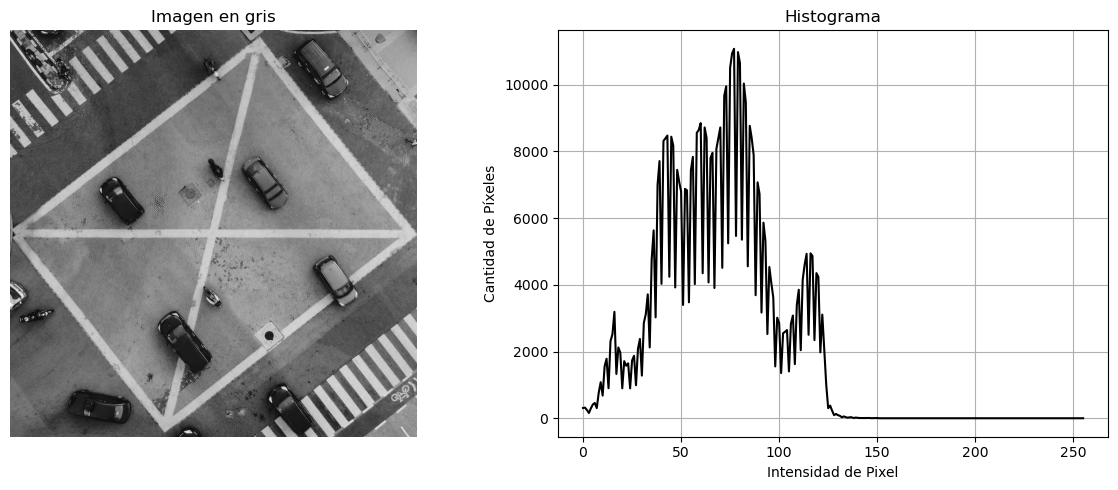

In [4]:
imagen_gris = cv2.cvtColor(img_G, cv2.COLOR_BGR2GRAY)# la imagen en la escala verde(img_G) se pasa a escala de grises.

# Calcular el histograma
histograma = cv2.calcHist([imagen_gris], [0], None, [256], [0, 256])

# Visualizar la imagen y su histograma
fig, ax = plt.subplots(1, 2, figsize=(12, 5))#Se Crea una figura con matplotlib con dos subtramas en este caso(dos imágenes en una fila) y establece el tamaño de la figura con "figsize".

# Mostrar la imagen en escala de grises
ax[0].imshow(imagen_gris, cmap='gray')#|
ax[0].set_title("Imagen en gris")     #|Configura la primera subtrama para mostrar la imagen(frame_b_r = img_G: que es la imagen del canal verde) en escala de grises, se coloca un título que incluye el número de frame, y elimina los ejes (axis)
ax[0].axis('off')                     #|

# Mostrar el histograma
ax[1].plot(histograma, color='black')  #|
ax[1].set_title("Histograma")          #|
ax[1].set_xlabel("Intensidad de Pixel")#|Configura la segunda subtrama para mostrar el histograma en escala de grises, se coloca un título que incluye el número de frame, etiquetas para los ejes y habilita las lineas de los ejes.
ax[1].set_ylabel("Cantidad de Píxeles")#|
ax[1].grid(True)                       #|


plt.tight_layout()#| Muestra la figura con las 2 subtramas.
plt.show()        #|

### Binarización del canal verde de la imagen

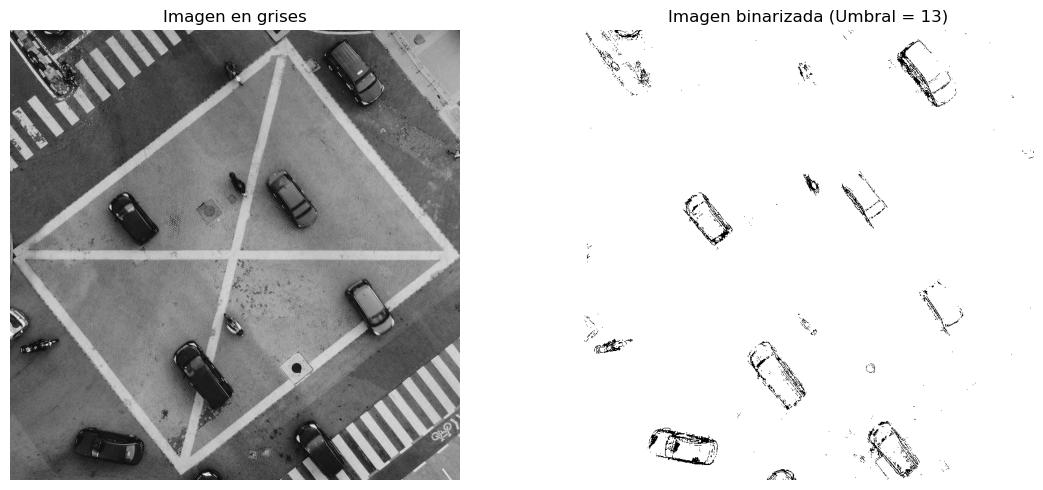

In [5]:

umbral = 13  # Esta variable tendra el valor del umbral que en este caso es 13, los píxeles con intensidades superiores al umbral se volverán blancos, y los píxeles con intensidades iguales o inferiores al umbral se volverán negros.

# Binarizar la imagen
_, imagen_binarizada = cv2.threshold(imagen_gris, umbral, 255, cv2.THRESH_BINARY)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))#Se Crea una figura con matplotlib con dos subtramas en este caso(dos imágenes en una fila) y establece el tamaño de la figura con "figsize".

# Mostrar la imagen en escala de grises
ax[0].imshow(imagen_gris, cmap='gray') 
ax[0].set_title("Imagen en grises")           
ax[0].axis('off')                                                

# Mostrar la imagen binarizada
ax[1].imshow(imagen_binarizada, cmap='gray')                             
ax[1].set_title(f"Imagen binarizada (Umbral = {umbral})")
ax[1].axis('off')                                                        

plt.tight_layout()#| Muestra la figura con las 2 subtramas
plt.show()        #|

### Comparativa de erosión y dilatación, uso de gaussiano y uso del operador NOT para el canal verde de la imagen

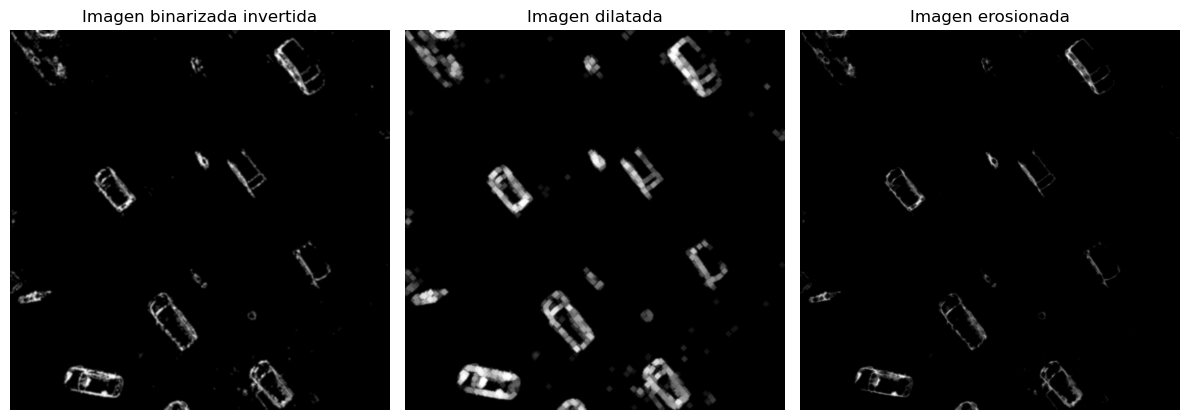

In [6]:
# Aplicar un filtro Gaussiano para suavizar la imagen y reducir el ruido
blurred = cv2.GaussianBlur(imagen_binarizada, (7, 7), 0)

imagen_b_invertido = cv2.bitwise_not(blurred)# se almacena el calculo de la binarizacion invertida con la propiedad de bitwise_not de la OpenCv(cv2), se dice invertida porque la informacion en negro se convertira en blanco y viceversa.

imagen_erosionada = cv2.erode(imagen_b_invertido, kernel, iterations=1)#En la variable imagen_erosionada, se almacena el calculo de la erosion mediante la propiedad "erode" de OpenCv(cv2), haciendo uso de la variable que contiene la binarizacion invertida
    #                                                                              "imagen_b_invertido" y el kernel de cicrculo que se establecio en los procesos inciales, por ultimo se pone las iteraciones que hara el proceso usado.

imagen_dilatada = cv2.dilate(imagen_b_invertido, kernel, iterations=2)#En la variable imagen_dilatada, se almacena el calculo de la dilatacion mediante la propiedad "dilate" de OpenCv(cv2), haciendo uso de la variable que contiene la binarizacion invertida
    #                                                                              ""imagen_b_invertido" y el kernel de cicrculo que se establecio en los procesos inciales, por ultimo se pone las iteraciones que hara el proceso usado.


fig, ax = plt.subplots(1, 3, figsize=(12, 5))#Se Crea una figura con matplotlib con tres subtramas en este caso(tres frames en una fila) y establece el tamaño de la figura con "fisize".

# Mostrar la imagen en escala de grises
ax[0].imshow(imagen_b_invertido, cmap='gray') #|
ax[0].set_title("Imagen binarizada invertida")#|Configura la primera subtrama para mostrar la imagen_b_invertido y elimina los ejes (axis)
ax[0].axis('off')                    #|

# Mostrar la imagen binarizada
ax[1].imshow(imagen_dilatada, cmap='gray')                               #|
ax[1].set_title(f"Imagen dilatada")#|Configura la segunda subtrama para mostrar la "imagen dilatada" y elimina los ejes (axis).
ax[1].axis('off')                                                         #|

# Mostrar la imagen binarizada
ax[2].imshow(imagen_erosionada, cmap='gray')                               #|
ax[2].set_title(f"Imagen erosionada")#|Configura la tercera subtrama para mostrar la "imagen_erosionada" y elimina los ejes (axis).
ax[2].axis('off')    

plt.tight_layout()#| Muestra la figura con las 3 subtramas
plt.show()        #|

### Conteo de vehículos, mostrando la gráfica de barras

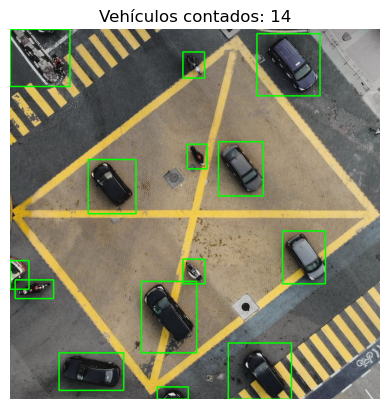

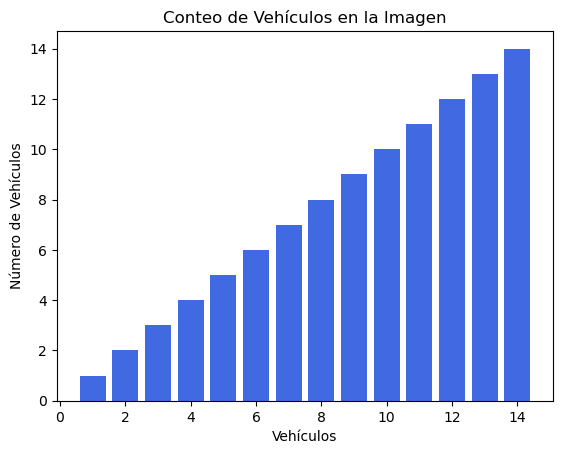

In [7]:
# Encontrar contornos en la imagen
contours, _ = cv2.findContours(imagen_dilatada, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#Inicialiar arreglos
counts = []
labels = []


# Inicializar un contador de vehículos
vehicle_count = 0

# Recorrer los contornos y contar los vehículos
for contour in contours:
    if cv2.contourArea(contour) > 1080:# Ajusta este valor según tus necesidades
        # Dibujar un rectángulo alrededor del vehículo
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(image_, (x, y), (x + w, y + h), (0, 255, 0), 2)
        vehicle_count += 1 
        counts.append(vehicle_count)#almacenar en el arreglo "counts" la variable "vehicle_count"
        labels.append(vehicle_count)#almacenar en el arreglo "labels" la variable "vehicle_count"


# Mostrar la imagen con los vehículos contados
plt.imshow(cv2.cvtColor(image_, cv2.COLOR_BGR2RGB))
plt.title(f'Vehículos contados: {vehicle_count}')
plt.axis('off')
plt.show()

#Mostrar el número de vehículos por medio de una gráfica de barras
plt.bar(labels, counts, color='royalblue')
plt.xlabel('Vehículos')
plt.ylabel('Número de Vehículos')
plt.title('Conteo de Vehículos en la Imagen')
plt.show()





### Uso de centroides en la imagen

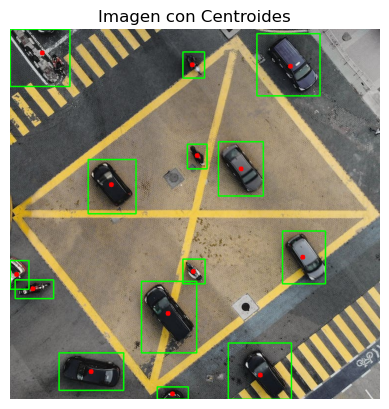

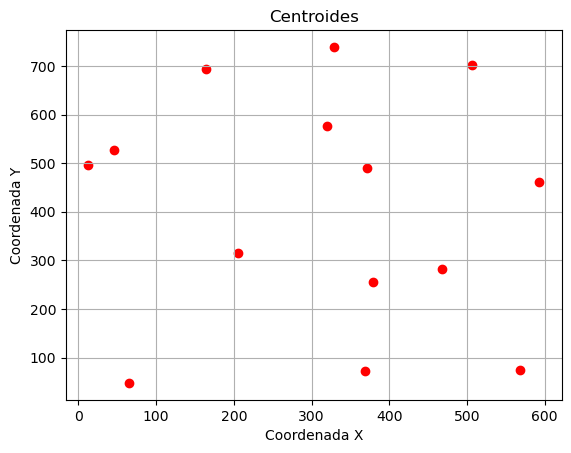

In [8]:
#Inicialiar arreglos
centroides_x = []
centroides_y = []



# Calcular y dibujar los centroides de los contornos
for contorno in contours:
    if cv2.contourArea(contorno) >= 900:# Ajusta este valor según tus necesidades
        momentos = cv2.moments(contorno)
        if momentos["m00"] != 0:
            # Dibuja circulos en los vehículos
            centroide_x = int(momentos["m10"] / momentos["m00"])
            centroide_y = int(momentos["m01"] / momentos["m00"])
            cv2.circle(image_, (centroide_x, centroide_y), 5, (0, 0, 255), -1)
            centroides_x.append(centroide_x)#se almacena "centroide_x" en el arreglo centroides_x
            centroides_y.append(centroide_y)#se almacena "centroide_y" en el arreglo centroides_y

# Convertir la imagen de BGR (OpenCV) a RGB (Matplotlib)
imagen_rgb = cv2.cvtColor(image_, cv2.COLOR_BGR2RGB)

# Mostrar la imagen con los centroides utilizando Matplotlib
plt.imshow(imagen_rgb)
plt.title('Imagen con Centroides')
plt.axis('off')
plt.show()

# Crear una gráfica para mostrar los centroides
plt.scatter(centroides_x, centroides_y, c='r', marker='o', label='Centroides')
plt.title('Centroides')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
# Mostrar la gráfica
plt.grid(True)
plt.show()